In [2]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('dehradun.csv')

# Parse datetime column
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y')

# Extract useful time-based features
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['day_of_year'] = df['datetime'].dt.dayofyear
df['week_of_year'] = df['datetime'].dt.isocalendar().week

# Fill missing values (e.g., forward-fill or backward-fill)
df.fillna(method='ffill', inplace=True)

# Check for remaining missing values
print(df.isnull().sum())


datetime              0
tempmax               0
tempmin               0
temp                  0
feelslikemax          0
feelslikemin          0
feelslike             0
dew                   0
humidity              0
precip                0
precipprob            0
precipcover           0
preciptype            1
snow                  0
snowdepth             0
windgust              0
windspeed             0
winddir               0
sealevelpressure      0
cloudcover            0
visibility            0
solarradiation        0
solarenergy           0
uvindex               0
severerisk          740
sunrise               0
sunset                0
moonphase             0
conditions            0
description           0
icon                  0
year                  0
month                 0
day                   0
day_of_year           0
week_of_year          0
dtype: int64


In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode the 'conditions' and 'preciptype' columns (categorical variables)
categorical_columns = ['conditions', 'preciptype']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Feature scaling for numerical features (like tempmax, tempmin, humidity, windspeed, etc.)
numerical_columns = ['tempmax', 'tempmin', 'temp', 'humidity', 'windspeed', 'cloudcover', 'precip']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the processed dataset
print(df.head())


    datetime   tempmax   tempmin      temp  feelslikemax  feelslikemin  \
0 2020-01-01 -1.731191 -1.998885 -1.935240          19.1           2.5   
1 2020-01-02 -1.919691 -1.732560 -1.790172          18.0           4.5   
2 2020-01-03 -1.525554 -1.795225 -1.709578          20.3           5.5   
3 2020-01-04 -2.296692 -1.795225 -1.935240          15.8           5.0   
4 2020-01-05 -1.988237 -2.124214 -2.031953          17.6           1.9   

   feelslike  dew  humidity    precip  ...  year  month  day  day_of_year  \
0        9.8  5.1  0.437936 -0.370081  ...  2020      1    1            1   
1       10.7  6.8  0.602178 -0.364124  ...  2020      1    2            2   
2       11.5  7.8  0.755825 -0.370081  ...  2020      1    3            3   
3       10.1  7.1  0.914769  0.166093  ...  2020      1    4            4   
4        9.4  5.7  0.708141 -0.370081  ...  2020      1    5            5   

   week_of_year  conditions_Overcast  conditions_Partially cloudy  \
0             1        

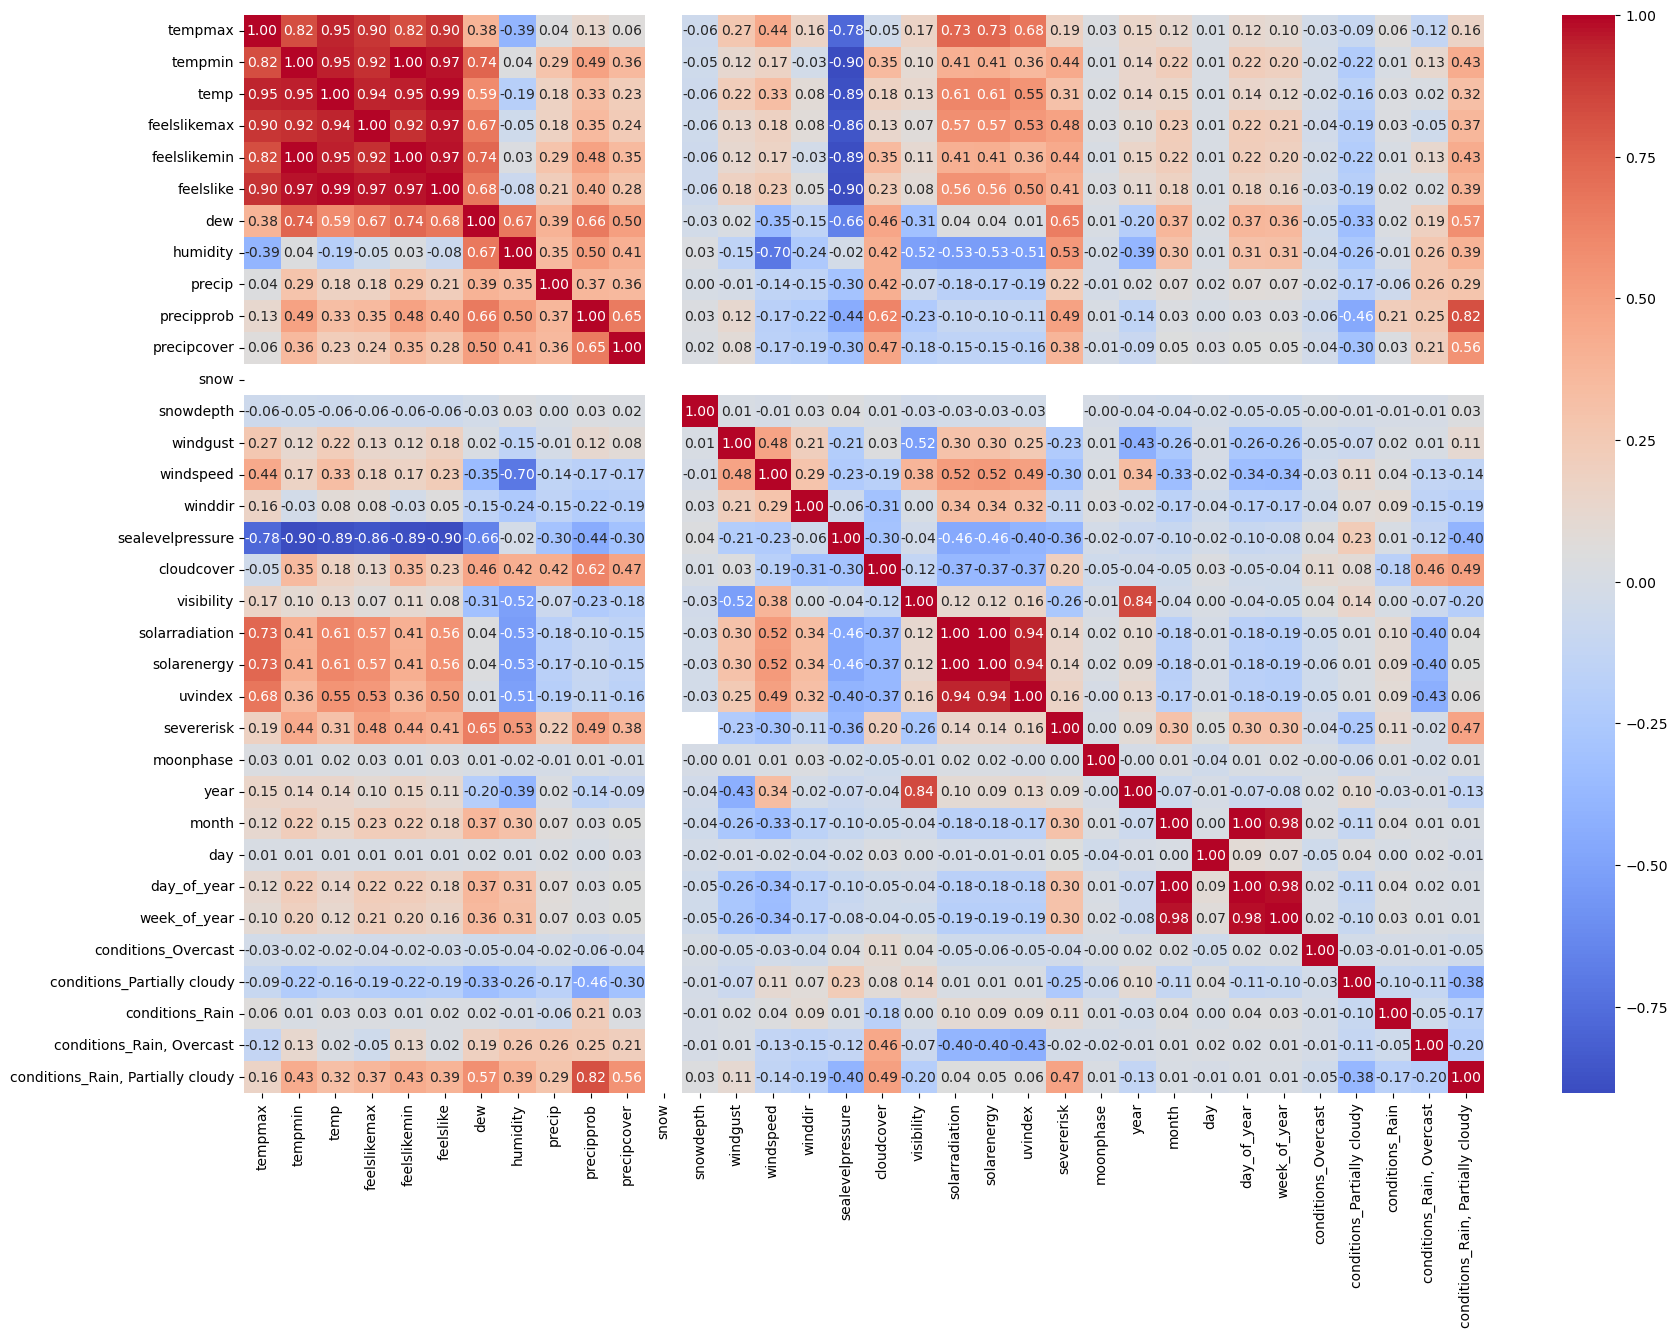

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(20, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Select features that are highly correlated with the target (e.g., 'temp' or 'humidity')
# You can adjust this step based on what you observe from the correlation matrix.
selected_features = ['tempmax', 'tempmin', 'humidity', 'windspeed', 'cloudcover', 'precip', 'year', 'month', 'day_of_year']
X = df[selected_features]
y_temp = df['temp']  # Target variable (temperature)
y_humidity = df['humidity']  # Target variable (humidity)
y_precip = df['precip']  # Target variable (rainfall)


In [8]:
from sklearn.model_selection import train_test_split

# Train-test split (e.g., 80% training, 20% testing)
X_train, X_test, y_train_temp, y_test_temp = train_test_split(X, y_temp, test_size=0.2, shuffle=False, random_state=42)
X_train, X_test, y_train_humidity, y_test_humidity = train_test_split(X, y_humidity, test_size=0.2, shuffle=False, random_state=42)
X_train, X_test, y_train_precip, y_test_precip = train_test_split(X, y_precip, test_size=0.2, shuffle=False, random_state=42)


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize the model
model = LinearRegression()

# Train the model on the training data (for temperature)
model.fit(X_train, y_train_temp)

# Make predictions on the test set
y_pred_temp = model.predict(X_test)

# Evaluate the model
mae_temp = mean_absolute_error(y_test_temp, y_pred_temp)
rmse_temp = np.sqrt(mean_squared_error(y_test_temp, y_pred_temp))

print(f'Temperature MAE: {mae_temp}')
print(f'Temperature RMSE: {rmse_temp}')


Temperature MAE: 0.0716428547658241
Temperature RMSE: 0.08685403052484122


In [10]:
# For humidity
model.fit(X_train, y_train_humidity)
y_pred_humidity = model.predict(X_test)
mae_humidity = mean_absolute_error(y_test_humidity, y_pred_humidity)
rmse_humidity = np.sqrt(mean_squared_error(y_test_humidity, y_pred_humidity))

print(f'Humidity MAE: {mae_humidity}')
print(f'Humidity RMSE: {rmse_humidity}')

# For precipitation
model.fit(X_train, y_train_precip)
y_pred_precip = model.predict(X_test)
mae_precip = mean_absolute_error(y_test_precip, y_pred_precip)
rmse_precip = np.sqrt(mean_squared_error(y_test_precip, y_pred_precip))

print(f'Precipitation MAE: {mae_precip}')
print(f'Precipitation RMSE: {rmse_precip}')


Humidity MAE: 1.1008225336761132e-14
Humidity RMSE: 1.2455394992047423e-14
Precipitation MAE: 1.1243720156806237e-15
Precipitation RMSE: 1.5063262406758497e-15
